In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [5]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

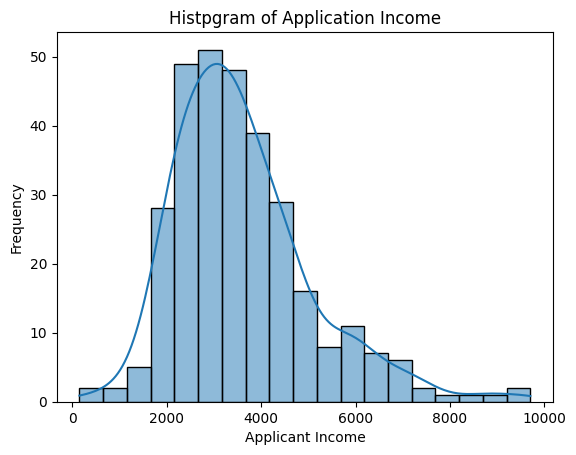

In [11]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Histpgram of Application Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

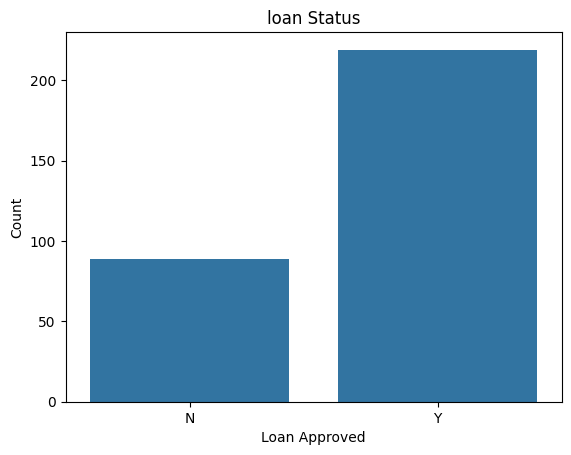

In [12]:
sns.countplot(x = "Loan_Status", data = df)
plt.title("loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [13]:
df.groupby("Education")["LoanAmount"].mean().reset_index()

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


In [14]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()

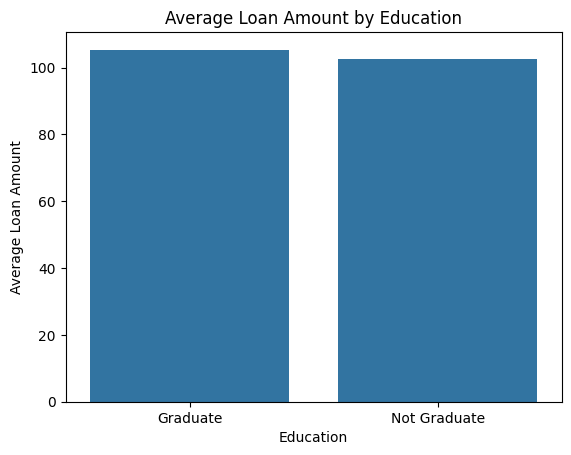

In [15]:
sns.barplot(x="Education", y="LoanAmount", data=avg_loan_amount_by_education)
plt.title("Average Loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

In [16]:
import matplotlib.pyplot as plt

In [17]:
df.groupby("Property_Area")["LoanAmount"].mean().reset_index()


,Property_Area,LoanAmount
0,Rural,111.360465
1,Semiurban,105.666667
2,Urban,97.474747


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelencoder = LabelEncoder()

In [20]:
df["Property_Area"] = labelencoder.fit_transform(df["Property_Area"])

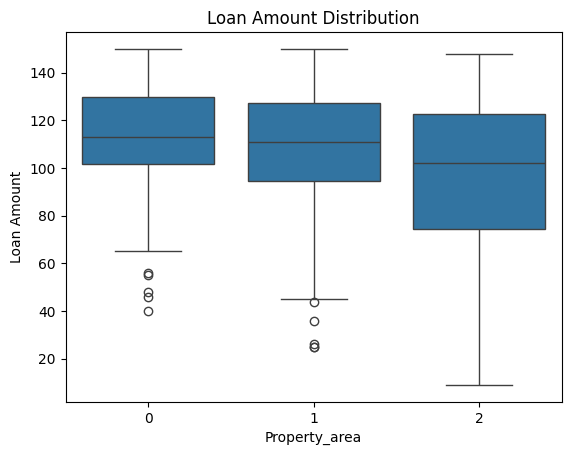

In [21]:
sns.boxplot(x="Property_Area", y="LoanAmount", data=df)
plt.title("Loan Amount Distribution")
plt.xlabel("Property_area")
plt.ylabel("Loan Amount")
plt.show()

Text(0, 0.5, 'count')

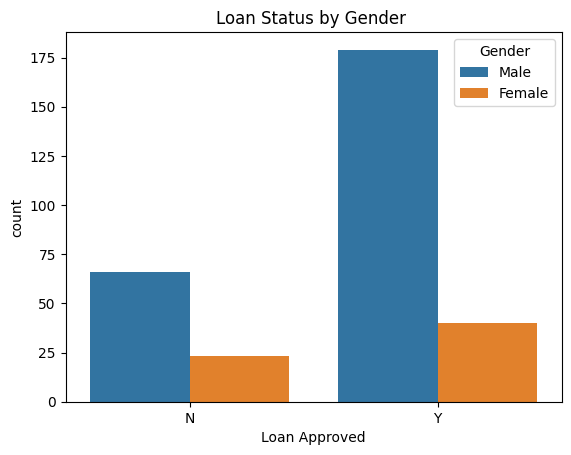

In [22]:
sns.countplot(x = "Loan_Status", hue = "Gender" , data = df)
plt.title("Loan Status by Gender ")
plt.xlabel("Loan Approved")
plt.ylabel("count")

<Axes: ylabel='count'>

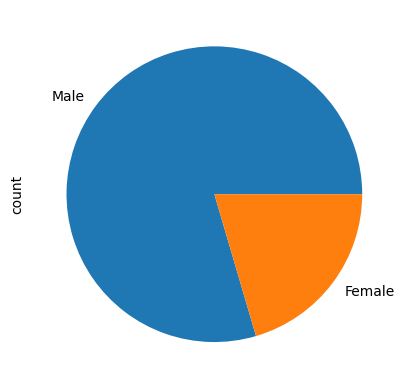

In [23]:
df["Gender"].value_counts().plot(kind="pie")

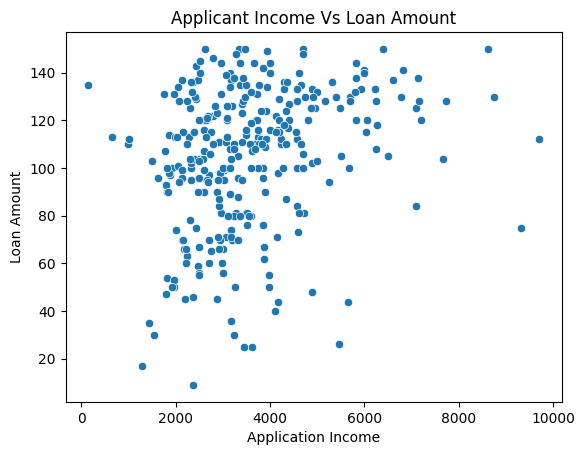

In [24]:
sns.scatterplot(x = "ApplicantIncome" , y = "LoanAmount", data = df)
plt.title("Applicant Income Vs Loan Amount")
plt.xlabel("Application Income")
plt.ylabel("Loan Amount")
plt.show()

In [25]:
Numeric_df = df.select_dtypes(include=["int64","float64"])

In [26]:
Numeric_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,4583,1508.0,128,360.0,1.0,0
1,3000,0.0,66,360.0,1.0,2
2,2583,2358.0,120,360.0,1.0,2
3,6000,0.0,141,360.0,1.0,2
4,2333,1516.0,95,360.0,1.0,2
...,...,...,...,...,...,...
376,5703,0.0,128,360.0,1.0,2
377,3232,1950.0,108,360.0,1.0,0
378,2900,0.0,71,360.0,1.0,0
379,4106,0.0,40,180.0,1.0,0


In [27]:
correlation_matrix = Numeric_df.corr()

In [28]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307,-0.059283
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715,0.030139
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853,-0.184085
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269,-0.101685
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000,0.058195
Property_Area,-0.059283,0.030139,-0.184085,-0.101685,0.058195,1.000000


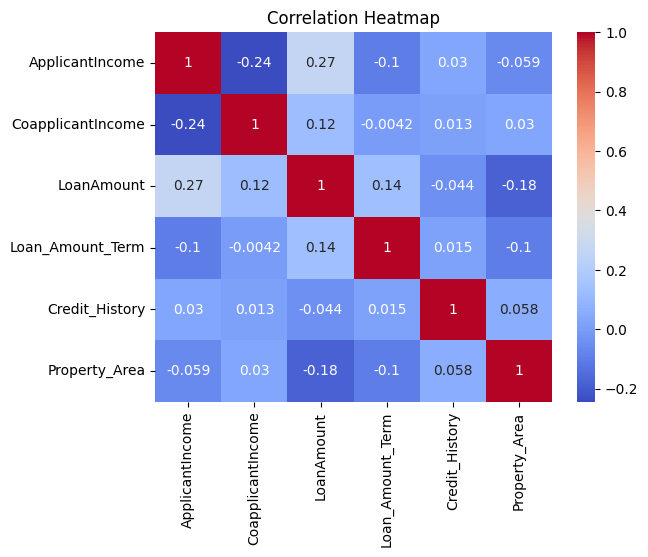

In [29]:
sns.heatmap(correlation_matrix , annot = True , cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
avg_loan_term_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()

In [31]:
avg_loan_term_by_employed 

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


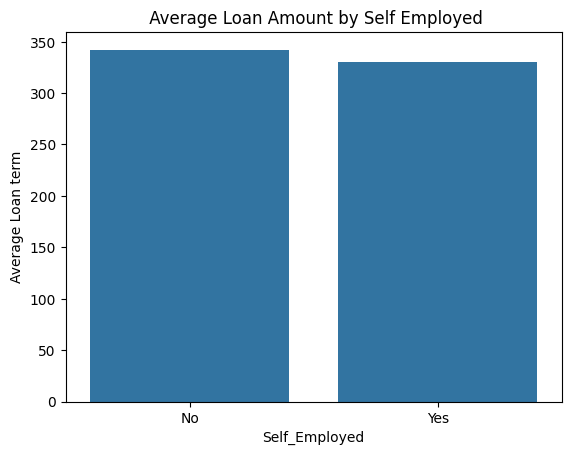

In [32]:
sns.barplot(x="Self_Employed", y="Loan_Amount_Term" , data = avg_loan_term_by_employed)
plt.title(" Average Loan Amount by Self Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Average Loan term")
plt.show()

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,0,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,2,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,2,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,2,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,2,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,0,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,0,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,0,Y


In [34]:
X = df[["ApplicantIncome", "Education", "LoanAmount","Credit_History", "Property_Area"]]


In [35]:
X

,ApplicantIncome,Education,LoanAmount,Credit_History,Property_Area
0,4583,Graduate,128,1.0,0
1,3000,Graduate,66,1.0,2
2,2583,Not Graduate,120,1.0,2
3,6000,Graduate,141,1.0,2
4,2333,Not Graduate,95,1.0,2
...,...,...,...,...,...
376,5703,Graduate,128,1.0,2
377,3232,Graduate,108,1.0,0
378,2900,Graduate,71,1.0,0
379,4106,Graduate,40,1.0,0


In [36]:
Y  = df[["Loan_Status"]]

In [37]:
Y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [38]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [39]:
Y["Loan_Status"] = labelencoder.fit_transform(Y["Loan_Status"])

C:\Users\hp\AppData\Local\Temp\ipykernel_7472\2313208880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Loan_Status"] = labelencoder.fit_transform(Y["Loan_Status"])


In [40]:
Y #1 is Y 0 is N

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [41]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [42]:
type(X["Credit_History"][0])

numpy.float64

In [43]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [44]:
X["Education"] = labelencoder.fit_transform(X["Education"])

C:\Users\hp\AppData\Local\Temp\ipykernel_7472\2197850253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = labelencoder.fit_transform(X["Education"])


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X["Property_Area"] = labelencoder.fit_transform(X["Property_Area"])


C:\Users\hp\AppData\Local\Temp\ipykernel_7472\1938307735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Property_Area"] = labelencoder.fit_transform(X["Property_Area"])


In [47]:
X = scaler.fit_transform(X)

In [48]:
X

array([[ 0.67389339, -0.58734842,  0.79689813,  0.41364557, -1.34675568],
       [-0.41036528, -0.58734842, -1.31665281,  0.41364557,  1.23767266],
       [-0.6959849 ,  1.70256694,  0.52418188,  0.41364557,  1.23767266],
       ...,
       [-0.47885919, -0.58734842, -1.14620515,  0.41364557, -1.34675568],
       [ 0.34717742, -0.58734842, -2.20298062,  0.41364557, -1.34675568],
       [ 0.67389339, -0.58734842,  0.96734579, -2.41752858, -0.05454151]],
      shape=(308, 5))

In [49]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y , test_size=0.4)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.linear_model import LogisticRegression
log_model =LogisticRegression(C=10.0, random_state=42)
log_model.fit(X_train , y_train)

c:\Users\hp\Desktop\Loan_Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
X_train

array([[-2.53514212e-01, -5.87348420e-01,  1.83286571e-01,
         4.13645575e-01,  1.23767266e+00],
       [-6.48039159e-01,  1.70256694e+00,  2.85555165e-01,
        -2.41752858e+00, -1.34675568e+00],
       [ 8.07360896e-02, -5.87348420e-01,  5.24181884e-01,
         4.13645575e-01, -5.45415072e-02],
       [-4.67215225e-01,  1.70256694e+00, -1.31665281e+00,
         4.13645575e-01, -1.34675568e+00],
       [-6.10463131e-02, -5.87348420e-01, -9.75757493e-01,
        -2.41752858e+00,  1.23767266e+00],
       [-6.95984899e-01,  1.70256694e+00,  5.24181884e-01,
         4.13645575e-01,  1.23767266e+00],
       [ 4.32109870e-01, -5.87348420e-01,  2.51465633e-01,
         4.13645575e-01, -5.45415072e-02],
       [ 8.75854811e-02, -5.87348420e-01,  8.99166728e-01,
         4.13645575e-01, -5.45415072e-02],
       [-3.87762285e-01, -5.87348420e-01, -3.28056399e-01,
         4.13645575e-01,  1.23767266e+00],
       [-5.28270434e-02,  1.70256694e+00, -8.05309837e-01,
         4.13645575e-01

In [56]:
log_predictions = log_model.predict(X_test)

In [57]:
modelperformance(log_predictions)

Accuracy score in model is 0.8225806451612904


In [58]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors" : [3,5,7,8,6],
              "weights": ["uniform", "distance"]}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train, y_train.values.ravel())

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [59]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [60]:
knpreds = gridkn.predict(X_test)

In [61]:
modelperformance(knpreds)

Accuracy score in model is 0.8145161290322581


In [62]:
from sklearn.svm import SVC

In [63]:
svm = SVC()
param_grid_svc = {"C":[0.4,0.01,0.02,0.01,0.5],"kernel":["linear","rbf","poly"]}

In [64]:
gridsvc = GridSearchCV(svm,param_grid_svc)

In [65]:
gridsvc.fit(X_train, y_train.values.ravel())

,estimator,SVC()
,param_grid,"{'C': [0.4, 0.01, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.4


In [66]:
gridsvc.best_params_

{'C': 0.4, 'kernel': 'linear'}

In [67]:
pred_svc = gridsvc.predict(X_test)
modelperformance(pred_svc)

Accuracy score in model is 0.8225806451612904


In [68]:
joblib.dump(gridsvc, "model.pkl")

['model.pkl']

In [69]:
X

array([[ 0.67389339, -0.58734842,  0.79689813,  0.41364557, -1.34675568],
       [-0.41036528, -0.58734842, -1.31665281,  0.41364557,  1.23767266],
       [-0.6959849 ,  1.70256694,  0.52418188,  0.41364557,  1.23767266],
       ...,
       [-0.47885919, -0.58734842, -1.14620515,  0.41364557, -1.34675568],
       [ 0.34717742, -0.58734842, -2.20298062,  0.41364557, -1.34675568],
       [ 0.67389339, -0.58734842,  0.96734579, -2.41752858, -0.05454151]],
      shape=(308, 5))

In [70]:
import joblib
testmodel = joblib.load("model.pkl")

In [71]:
testmodel.predict([[10000,0,3000,1,2]])[0]

np.int64(1)